# 빅데이터05-기술통계 

- 데이터 읽기 및 탐색
- 데이터(변수) 종류 별 통계 : nominal-도수, numeric-기술통계
- 1변수 분석 : 평균 분석 등
- 결측치, outlier 

## 데이터 읽기 

- 타이타닉 탑승객 데이터 
- seaborn 라이브러리에 데이터가 포함되어 있음

In [1]:
import seaborn as sns
import pandas as pd

titanic= sns.load_dataset("titanic")  #sample dataframe 불러오기
titanic.to_csv("titanic.csv", index=False)  #save

## 데이터 보기

- 필드 정의(설명서)확보
- 실제 데이터 보기 : 엑셀, 
- 기본정보 획득 : df.info(), df.titanic

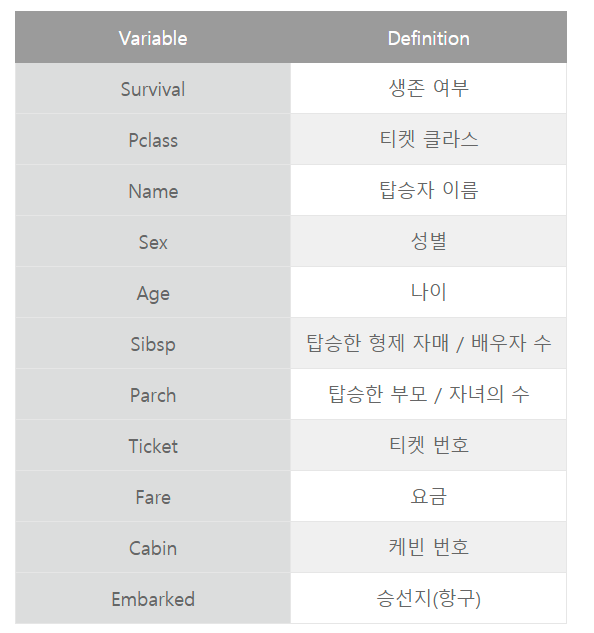

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- excel

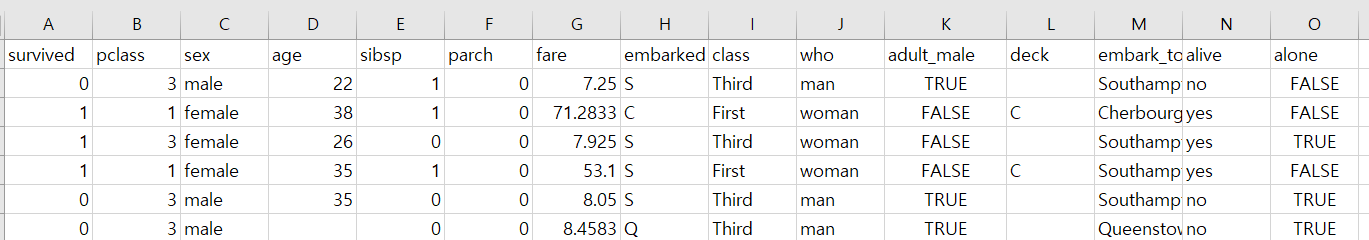


In [3]:
# 데이터 타입 조회 
# non-null count 주목

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# 읽어 들인 데이터 보기

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 기본 통계  -  nominal 

- 도수 세기
- 도수의 % 
- 시각화

### 도수세기 
- df.컬럼명.value_counts() or df['컬럼명'].value_counts()
- %로 나타내기 : normalize=True

In [5]:
# 성별 count
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [6]:
#  성별 count %
titanic.sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [7]:
# 모든 컬럼에 대해 count 보기

for i in titanic.columns : 
    print(  titanic[i].value_counts())


0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

### 도수의 시각화
- bar or pie :    count().plot ( kind='bar' or 'pie')

<AxesSubplot:>

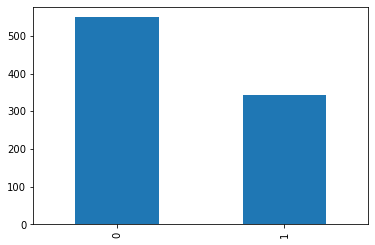

In [8]:
import matplotlib.pyplot as plt

# 생존자 사망자  

titanic.survived.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='survived'>

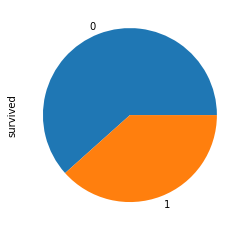

In [9]:
# pie

titanic.survived.value_counts().plot(kind='pie')

- seaborn 라이브러리 함수 : countplot
     - countplot (컬럼, data=데이터)
     - 좀 더 모양이 예쁘고 다양한 parameter가 있음
 

<AxesSubplot:xlabel='survived', ylabel='count'>

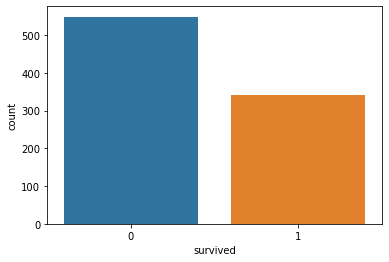

In [10]:
sns.countplot(x='survived', data=titanic)

##  Numeric data

- 기술 통계
- 평균 vs. 중간값
- quartile , IQR
- 시각화
- outlier

### 기술 통계

- df.describe() : 기술
- 데이터에 대한 가장 기본적 분석 : 범위, 최대, 최소, 평균


In [11]:
# numeric data 기술 통계 보기
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 평균 vs. 중간값

- 평균을 구하는 것은 데이터에 대해 가장 기본적인 분석
- 평균은 특이값에 영향을 많이 받음 

In [12]:
import numpy as np
np.mean ([52, 53, 60, 64, 76])

61.0

In [13]:
np.mean([52, 53, 60, 64, 76, 500 ])

134.16666666666666

- 중간값 : 특이값에 크게 영향 받는 것을 보완

In [14]:
# 홀수개 데이터면 가운데값

np.median( [52, 53, 60, 64, 76])

60.0

In [15]:
# 데이터가 짝수개 이면 가운데 2 값의 평균

np.median([52, 53, 60, 64, 76, 500 ])

62.0

- Quartile : 1/4 단위로 자른 0%, 25%, 50%, 75% , 100% 의 값  
- Quantile : 100% 중에 어느 값
- IQR : 25~75% 의 범위 => 극단값에 영향을 받지 않는 중간 50% 의 범위를 의미

In [16]:
titanic.quantile(0.5)

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
Name: 0.5, dtype: float64

In [17]:
titanic.age.quantile(0.5)

28.0

## 수치 데이터 시각화1 boxplot 

- 값의 분포를 볼 수 있다
- 중간값, outlier 등을 확인

{'whiskers': [<matplotlib.lines.Line2D at 0x24d6830aeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d683185e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d6830ab50>],
 'medians': [<matplotlib.lines.Line2D at 0x24d68318ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d68322040>],
 'means': []}

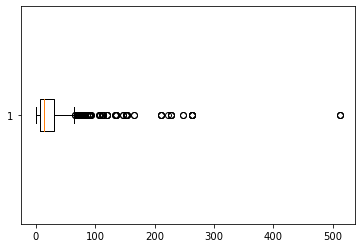

In [18]:
# numeric data 요금 분포 보기
plt.boxplot(titanic.fare, vert=False)

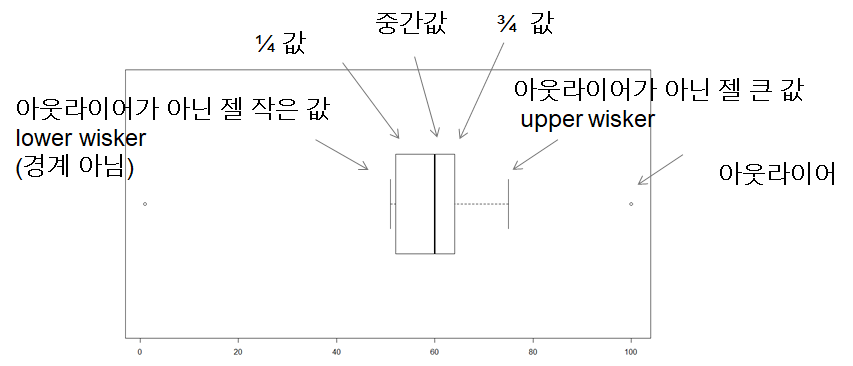

## outlier 

- 값이 다른 데이터 분포를 크게 벗어나는 데이터 
- 평균 등에 큰 영향을 줌
- 처리상의 오류일 수도 있고, 진짜 큰 값일 수도 있다  (몸무게 300kg vs. 500kg, 연매출 1조 vs. 8000조 ) 
- 통계적 정의 ( by John Tukey) 
    - 25% 값 - 1.5 X IQR 보다 작은 값 
    - 75% 값 + 1.5 X IQR 보다 큰 값
    

In [19]:
# outlier 직접 구하기

Q1=titanic.fare.quantile(.25)
Q3=titanic.fare.quantile(.75)
border= Q3+(Q3-Q1)*1.5
border  #outlier 경계선

65.6344

## 수치 데이터 시각화2 
- numeric (continuous) data => 구간화 (bin) 해서 출력 
- countplot 으로 출력하는 경우  : 동일 값이 많이 나오면 그걸 보여주기는 하지만 어느 부분에 분포가 많이 되어 있는지와는 또 다르다
- 정수 데이터와 실수 데이터는 또 양상이 다르다

<AxesSubplot:xlabel='fare', ylabel='count'>

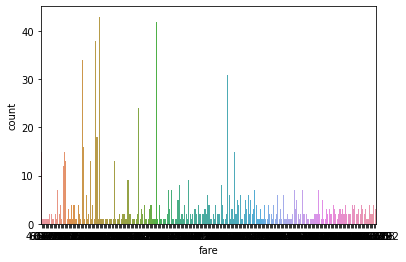

In [20]:
sns.countplot(x='fare', data=titanic)

- histplot : 히스토그램, bins 설정

<AxesSubplot:xlabel='fare', ylabel='Count'>

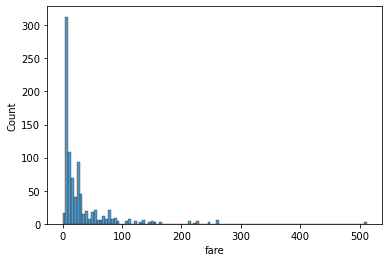

In [21]:
sns.histplot(x='fare', data=titanic)  #bin 자동설정

<AxesSubplot:xlabel='fare', ylabel='Count'>

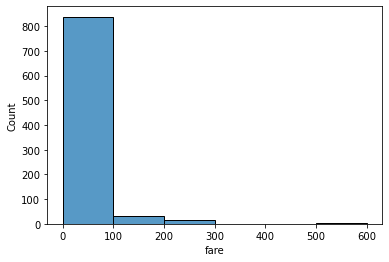

In [22]:
sns.histplot(x='fare', data=titanic, bins=[0,100,200,300,400,500,600]) # 또는 bins= 갯수

## 결측치, 오류 데이터 처리 

- 특이치 : 실제 데이터 값이 특이하게 크거나 작거나, 주로 numeric에서 
    - 원칙은 아웃라이어 기준으로 판단해야.. 
    - quantile (0.99) 값 등으로 대체 하기도 함
- 결측치 : 데이터 값이 없는 것 , NA라고도 함
    - 해당 레코드를 삭제하거나
    - 통계시 (통계란 column 단위로 이뤄짐) 해당값 빼고 계산
    - 대체 값 (평균, 중간값, 임의값, random 값) 을 만들어 넣기
    - column 별로 통계를 내는 것이기 때문에 결측치가 있어도 상관없다. 엉뚱한 값을 억지로 넣는 것 보다는.. 
            - 다만, paired value analysis (같은 레코드의 두 값을 비교 ) 하는 경우는 결측치가 있으면 안됨
- 오류 : 쓰레기 값이 들어있는 경우 
    - cleansing 이 필요: 원래 값을 살릴 수 있으면 살리고, 아니면 NA화 후 처리 
        - whitespace제거 등등
        - 같은 항목으로 count될 수 있게
    - 혈액형 A, B, O, AB 만 있어야 <= category의 경우 프로그램적으로 거를 수 있다


### 결측치 (NA) 처리
- 결측치 찾기 : isnull()
- 값 넣기 :  fillna ( 넣을값 ) 
- 결측치 포함 행 (레코드) 삭제 : dropna( subset=[체크할 컬럼명 ] ) 

In [23]:
# 결측 통계

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
#  age 결측치 중간 값으로 채워넣기 : column 값을 다시 만들어서 assign 해야 반영됨

titanic.age = titanic.age.fillna( titanic.age.median())

In [25]:
# embark_town이 null인 레코드 지우기 :  dropna()는 변경된 객체를 리턴함에 주의

titanic = sns.load_dataset("titanic")
titanic = titanic.dropna(subset=['embark_town'])
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### category 세팅

- 컬럼.unique() : unique 값 조회
- pd.Categorical( 컬럼 , categories=[값, 값, 값 .. ] )  # 정해진 값 이외에는 NaN 으로 처리



In [26]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [27]:
pd.Categorical ( titanic.who, categories=["man", "woman"]).unique()

['man', 'woman', NaN]
Categories (2, object): ['man', 'woman']

## 통계적 추정(샘플 조사)

- 빅데이터 : 전체 (투표) , 통계 : 샘플 (여론조사)
- 샘플 -> 전체를 추정 (여론 조사) 
    - 샘플통계 : 샘플 1000명을 조사 해본 결과 400명이 지지했다
    - 점추정 : 전체 인구의 지지율도 40% 일 것이다
    - 구간 추정
        - 여론조사 결과 40% (95% 신뢰 구간에서 ±4% 오차)
        - = 모집단(전체 인구) 의 (실제)지지율은 95%의 확률로 40%±4% 인 36%~44% 사이에 있을 것이다. 
        - = 36~44% 사이에 있을 확률이 95%
        - = 5%의 가능성으로 36% 보다 작거나 44% 보다 클 수 있다.
    
    
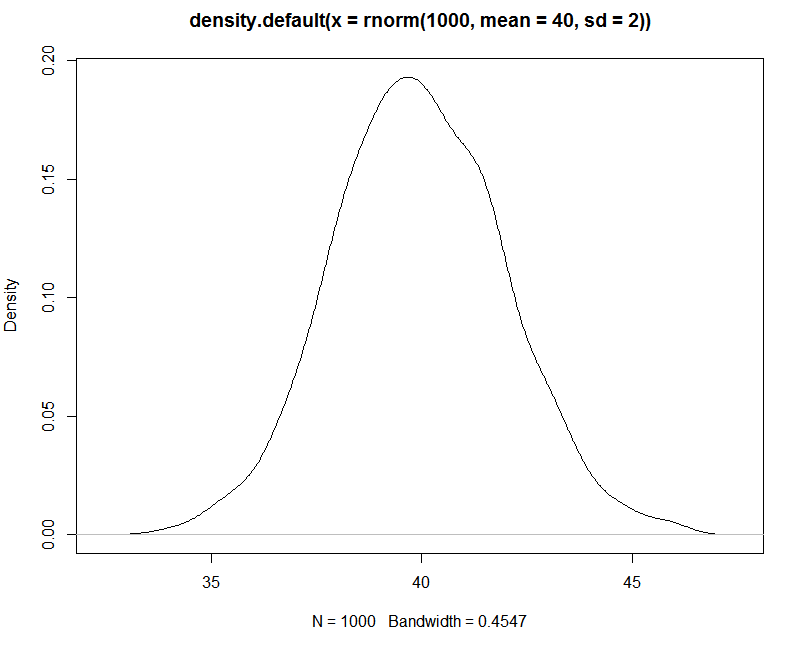

## 신뢰구간 구하기 (추정)

- import scipy.stats as st
- 30 개 이하의 샘플 :  st.t.interval(alpha=신뢰구간, df=샘플 갯수-1, loc=평균, scale=평균오차) <- t분포
- 30 개 이상 : st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data)) <- 정규분포
- 샘플 뽑기 : df.sample( n=샘플갯수 or frac= 샘플비율)

In [28]:
import scipy.stats as st
import numpy as np

sample1=titanic.sample (n=30)
sample2=titanic.sample (frac=0.1)

print ( "sample1:", np.mean(sample1.fare),  st.t.interval(alpha=0.99, df=len(sample1)-1, loc=np.mean(sample1.fare), scale=st.sem(sample1.fare)))
print ( "sample2:", np.mean(sample2.fare), st.norm.interval(alpha=0.90, loc=np.mean(sample1.fare), scale=st.sem(sample1.fare)))
print ("population:", np.mean(titanic.fare))

sample1: 45.47069666666666 (-4.874365271166376, 95.8157586044997)
sample2: 27.70571011235955 (15.427640062265535, 75.51375327106777)
population: 32.09668087739032


## 평균비교

- 2개의 평균이 있을 때, 샘플에서는 평균이 차이가 나는데 실제 모집단에서도 차이가 날지 분석
- one sample t-test :  1개의 평균값 (ex, 지난 선거에서 지지율) 이 주어져 있고, 샘플 데이터 (ex. 이번달 여론조사 데이터) 가 주어진 경우, 유의미한 차이가 있나?
- 가설 검정
    - 가설 : 실제 모집단에서는 차이가 없다
    - 검정 : 가설이 맞는지 판단하는 절차 
- 예 
    - 키 크는 약이 효과가 있는지.. 약을 먹인 몇 명의 결과를 놓고 판단하고자 함
    - 원래 전체 인구의 키 평균 = 164
    - 약먹인 사람(샘플)의 평균 = 167 
    - 영가설 : 원래 키에서 변동이 없다 (샘플에서만 평균이 높게 나왔을 뿐) 
    - 검정 : 샘플로 추정할 수 있는 모집단의 신뢰구간 (전체 인구에게 약을 먹였을 때, 그 평균은 95%의 확률로 이 구간내에 있을 것이다) 안에 원래 평균이 있다면, 영가설이 맞다 (변동이 없다=효과가 없다)  
    - 만약 검정 결과 원래 평균이 신뢰 구간 밖이라면, 영가설 기각 (변동이 있다)
    - => 통계적으로 유의미한 차이가 있다.

- st.ttest_1samp(데이터, 비교평균)
    - pvalue < 0.05 이면 영가설 기각 (아니면 영가설이 맞음)

In [29]:
st.ttest_1samp (sample1.fare, 20)

Ttest_1sampResult(statistic=1.3945174868461954, pvalue=0.17375327304455346)

## 도수비교

- nominal 데이터의 값 별 분포가 차이가 있는가? (샘플에서 그렇게 나왔는데 전체도 그렇다고 추정할 수 있나?)
- 특정 혈액형이 더 많은가?  
- 가설 : 혈액형 분포는 같다 = 고르게 분포한다 (영가설)
- 검정 : chisquare ( 데이터 ) 
    - 실제 분포가 균등한데, 샘플이 이렇게 나올 확률을 얻음
    - if pvalue < 0.05  전체도 다르다고 추정할 수 있음
    - => 통계적으로 유의미한 차이가 있다.
    

In [30]:
# chisqaure 사용법
from scipy.stats import chisquare
chisquare ([10, 15, 20, 5])

Power_divergenceResult(statistic=10.0, pvalue=0.01856613546304325)

In [31]:
# titanic data에 적용 
num_class=titanic["class"].value_counts()
chisquare (num_class)
#num_class

Power_divergenceResult(statistic=193.33858267716536, pvalue=1.0400643301640263e-42)

## 정리

- 변수 1개 = column 1개 =한가지 데이터 에 대한 분석 
    - nominal : 개수, portion, 차트 
    - numeric : 기술통계, plotting
- 문제 데이터 처리
    - 결측치
    - 이상치
    - outlier
- 가설 검정
    - numeric : 평균비교 = t.test
    - nomianl : 분포 = chisquare
